In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Linear Regression

Linear regression is a fundamental algorithm in machine learning.

It is used as a building block for other machine learning models.

Linear regression is easy to understand, calculate, and interpret.

Linear regression is fast!

Often good enough. Don't over-engineer your solution. If your data is linear, use a linear model.

What is linear data?

In [41]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=1, random_state=0, noise=5, bias=100.0)

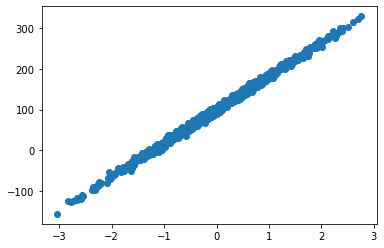

In [42]:
plt.scatter(X, y)

We can observe from the data that we have a linear trend in our model: the response or output is directly proportional to the input.

We can use linear regression to fit a line through the data.

![lr](../Images/linear_regression.jpg)

Using a trained model allows us to make predictions for the output value (home selling price) given a new input (square feet).

![pre-prices1](../Images/predict_prices_1.png)

New House on the Market
![pre-prices2](../Images/predict_prices_2.png)

We can use our linear model to predict the price of that house
![pre-prices3](../Images/predict_prices_3.png)

What about nonlinear data?

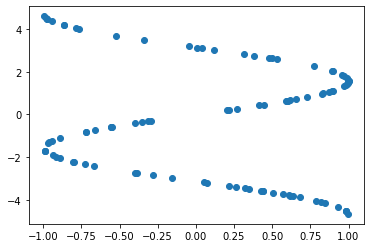

In [4]:
from sklearn.datasets import make_s_curve

data, color = make_s_curve(100, random_state=0)
plt.scatter(data[:,0], color)

![happy](../Images/happy.gif)

## Linear Regression 

A regression line is simply calculating a line that best fits the data. This is typically done through the least squares method, where the line is chosen to have the smallest overall distance to the points.

$y = \beta_0 + \beta_1 x$

* $y$ is the output response
* $x$ is the input feature
* $\beta_0$ is the y-axis intercept
* $\beta_1$ is weight coefficient (slope)

Source: [Linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression)

## Sklearn

The Sklearn library provides us with a linear regression model that will fit a line to our data. Sklearn follows a consistent API, where you define a model object, fit the model to the data, and then make predictions with the model.
![sklearn](../Images/sklearn_api.png)

First, we create the model by using the Sklearn LinearRegression model.

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [60]:
y

array([-1.12690263e+02,  2.48365059e+02, -4.11147161e+01,  2.95242459e+00,
       -1.99293750e+01,  1.14771278e+02,  2.26270729e+02,  1.14555867e+02,
        4.17479150e+01,  1.53018293e+02,  6.45170372e+01,  4.29064299e+01,
        1.68593531e+02,  6.52565075e+00,  2.09972136e+02,  1.26311391e+02,
        1.71085888e+02,  2.11422195e+02,  1.09821552e+02, -2.65721910e+01,
        6.48152148e+01,  3.83341505e+01,  1.31578566e+02,  5.96248106e+01,
        1.85362583e+02,  1.87144640e+02,  5.22448517e+01,  4.78019762e+01,
        9.00719393e+01,  1.14097905e+02,  1.61435543e+01,  1.80573217e+02,
        3.47349856e+01,  1.03630871e+02,  1.24264319e+02,  1.23276876e+02,
        8.55173368e+01,  4.54706857e+01,  1.79459744e+02,  6.29012590e+01,
        2.57330223e+01,  9.00185074e+01,  5.71142114e+01, -5.58115027e+01,
        2.64567615e+02,  7.11822682e+01, -1.16246793e+01,  2.27251387e+02,
        7.22187161e+01,  8.89211082e+01,  2.04882496e+02,  2.54310700e+02,
        6.46984940e+00,  

Next, we fit the model to our data by using the fit method. 

In [61]:
model.fit(X, y)
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([82.16086462]),
 '_residues': 24610.377337239923,
 'rank_': 1,
 'singular_': array([31.21272908]),
 'intercept_': 100.12938791888158}

We can view the coefficients and intercept of the line from the `coef_` and `intercept_` attributes. Note that the underscore (`_`) suffix indicates that the attribute is available after the model is fit to the data (trained).

In [62]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [82.16086462]
y-axis intercept:  100.12938791888158


Our linear model now looks like this: 

$y = 101.896225057 + 12.44002424 x$


We can use our model to make predictions.

In [64]:
predictions = model.predict(X)
print(f"x: {X[0]}")
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

x: [-2.55298982]
True output: -112.69026310363523
Predicted output: -109.62646271844122
Prediction Error: 3.063800385194014


In [65]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,-109.626463,-112.690263,3.063800
1,245.065454,248.365059,-3.299605
2,-47.047632,-41.114716,-5.932916
3,0.379739,2.952425,-2.572686
4,-18.588148,-19.929375,1.341227
...,...,...,...
995,292.354985,290.982658,1.372327
996,75.291933,71.809590,3.482343
997,147.502588,145.053468,2.449120
998,64.376796,64.416187,-0.039391


We can calculate the output response for the minimum and maximum input values. Note: This will be useful later when we want to plot the fit line.

In [66]:
x_min = X.min()
x_max = X.max()

In [67]:
y_min_actual = y.min()
y_max_actual = y.max()

In [68]:
y_min = 101.896225057 + (12.44002424 * x_min)
y_max = 101.896225057 + (12.44002424 * x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: -156.32069142756947
Calculated Min Value: 64.00213161678127
Actual Max Value: 329.04710950390484
Calculated Max Value: 136.22266956219644


We can also use the predict function to calculate the predicted values. Note: The format for passing values to `model.predict()` is a list of lists.

In [69]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: -156.32069142756947
Predicted Min Value: [-150.14435922]
Actual Max Value: 329.04710950390484
Predicted Max Value: [326.84038988]


We can show the model fit by plotting the predicted values against the original data.

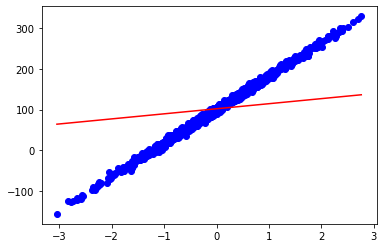

In [70]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [71]:
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.9962717707443287


## Your turn!